# **Tweets**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
import re
from nltk.corpus import stopwords
import seaborn as sns
import string

# data = pd.read_csv("/content/drive/MyDrive/DIC/Tweets/ukraine.csv")
data = pd.read_csv("/content/drive/MyDrive/DIC/Tweets/trans_french.csv")
print(data.head())

/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


                userid         username  \
0  1273218547846729729       ArabNewsfr   
1            121812371       AmorShabbi   
2  1405173577427656706  TheFactChecke13   
3   860895838742208513        Bigfive16   
4           2499735536          004nino   

                                            acctdesc               location  \
0  Arab News en français, l’édition francophone d...                  Riyad   
1  Algerian Journalist, Reporting on Sahel & MENA...  Constantine, Algeria.   
2                                                NaN                    NaN   
3                             ø 🌎🌍🌏🆒🆓☮️🕊❤️🦁🐘🦏🐬🇵🇸🇫🇷🔻🐢                 FRANCE   
4  Retraité.Égalité,fraternité,justice,liberté,na...         Québec, Canada   

   following  followers  totaltweets               usercreatedts  \
0         75      44537        53368  2020-06-17 11:39:14.000000   
1       3403       4925       420718  2010-03-10 17:27:12.000000   
2        307          6          111  2021-06-16 14:41:17.0000

In [2]:
data.columns

Index(['userid', 'username', 'acctdesc', 'location', 'following', 'followers',
       'totaltweets', 'usercreatedts', 'tweetid', 'tweetcreatedts',
       'retweetcount', 'text', 'hashtags', 'language', 'coordinates',
       'favorite_count', 'extractedts', 'processed_text', 'translated'],
      dtype='object')

In [3]:
data.rename(columns = {'translated':'tweet'}, inplace = True)

In [4]:
data

,userid,username,acctdesc,location,following,followers,totaltweets,usercreatedts,tweetid,tweetcreatedts,retweetcount,text,hashtags,language,coordinates,favorite_count,extractedts,processed_text,tweet
0,1273218547846729729,ArabNewsfr,"Arab News en français, l’édition francophone d...",Riyad,75,44537,53368,2020-06-17 11:39:14.000000,1509681957596123136,2022-04-01 00:00:01.000000,0,Ces nouvelles sanctions portent à plus de 1 00...,"[{'text': 'russes', 'indices': [69, 76]}, {'te...",fr,NaN,0,2022-04-01 00:14:21.415647,Ces nouvelles sanctions portent plus de 1 000 ...,"These new sanctions bring more than 1,000 indi..."
1,121812371,AmorShabbi,"Algerian Journalist, Reporting on Sahel & MENA...","Constantine, Algeria.",3403,4925,420718,2010-03-10 17:27:12.000000,1509682041276747780,2022-04-01 00:00:21.000000,0,Read The @AmorShabbi Daily! https://t.co/opta...,"[{'text': 'ukraine', 'indices': [108, 116]}, {...",fr,NaN,0,2022-04-01 00:01:44.294934,Read The Daily Les unes d aujourd hui via,Read The Daily Headlines today via
2,1405173577427656706,TheFactChecke13,NaN,NaN,307,6,111,2021-06-16 14:41:17.000000,1509682275985895432,2022-04-01 00:01:17.000000,7,"Ukraine: dans les zoos, les animaux risquent d...","[{'text': 'Ukraine', 'indices': [106, 114]}]",fr,NaN,0,2022-04-01 00:24:47.217525,Ukraine dans les zoos les animaux risquent de ...,Ukraine in zoos animals risk starving to death
3,860895838742208513,Bigfive16,ø 🌎🌍🌏🆒🆓☮️🕊❤️🦁🐘🦏🐬🇵🇸🇫🇷🔻🐢,FRANCE,2919,1578,168426,2017-05-06 16:35:37.000000,1509682377257373704,2022-04-01 00:01:41.000000,32,🇺🇦 C'est le genre de matériel que les nazis d'...,"[{'text': 'Azov', 'indices': [58, 63]}]",fr,NaN,0,2022-04-01 00:24:46.571911,C est le genre de mat riel que les nazis d par...,This is the kind of material the Nazis share w...
4,2499735536,004nino,"Retraité.Égalité,fraternité,justice,liberté,na...","Québec, Canada",6646,6060,238546,2014-05-16 19:49:55.000000,1509682429069516807,2022-04-01 00:01:54.000000,0,#Guerre #en #Ukraine : les #Russes ont #quitté...,"[{'text': 'Guerre', 'indices': [0, 7]}, {'text...",fr,NaN,0,2022-04-01 00:24:45.817534,les ont Le via,have them via
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,1447931821048619012,GammAadron,Misanthrope du camp du mal | Apprécie le 7ème ...,Bretagne,137,41,4186,2021-10-12 14:27:40.000000,1510292323816640518,2022-04-02 16:25:24.000000,113,Je suis le seul à être convaincu que (au moins...,"[{'text': 'Ukraine', 'indices': [97, 105]}]",fr,NaN,0,2022-04-02 16:30:45.969262,Je suis le seul tre convaincu que au moins 50 ...,I am the only one convinced that at least 50 o...
29996,927446173,mariecolmant1,NaN,NaN,320,5063,14158,2012-11-05 11:43:57.000000,1510292330854637569,2022-04-02 16:25:26.000000,197,"MAJEUR\nDébut novembre 2021, William Burns, di...","[{'text': 'Biden', 'indices': [100, 106]}, {'t...",fr,NaN,0,2022-04-02 16:30:45.766584,MAJEUR D but novembre 2021 William Burns direc...,MAJOR Beginning of November 2021 William Burns...
29997,1556443974,komenan2,NaN,NaN,274,105,2139,2013-06-29 20:26:02.000000,1510292356725190658,2022-04-02 16:25:32.000000,8,L'Allemagne🇩🇪 convoi du matériel militaire aux...,"[{'text': 'UkraineRussiaWar', 'indices': [87, ...",fr,NaN,0,2022-04-02 16:30:45.262268,L Allemagne convoi du mat riel militaire aux f...,Germany convoy of military equipment to Polish...
29998,1316875043176067074,CourtemancheJa1,NaN,NaN,15,75,12841,2020-10-15 22:54:47.000000,1510292365365366790,2022-04-02 16:25:34.000000,208,"🇷🇺Avec quelle décontraction insolente, Epatant...","[{'text': 'Russia', 'indices': [65, 72]}, {'te...",fr,NaN,0,2022-04-02 16:32:45.101307,Avec quelle d contraction insolente Epatant,With what insolent contraction Amazing


In [5]:
data = data[["username", "tweet", "language"]]
data.isnull().sum()
data["language"].value_counts()

fr    30000
Name: language, dtype: int64

In [6]:
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
stopword=set(stopwords.words('english'))

def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
data["tweet"] = data["tweet"].apply(clean)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


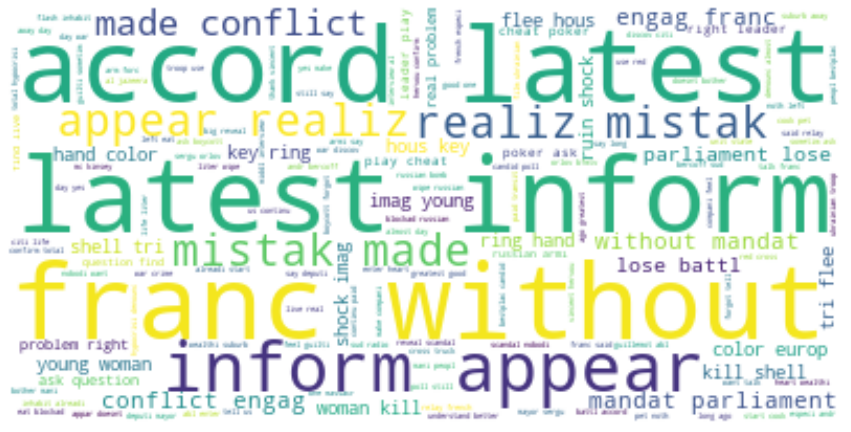

In [7]:
text = " ".join(i for i in data.tweet)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [8]:
nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["tweet"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["tweet"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["tweet"]]
data = data[["tweet", "Positive", "Negative", "Neutral"]]
print(data.head())

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


                                               tweet  Positive  Negative  \
0  new sanction bring  individu entiti russia rus...     0.000       0.0   
1                       read daili headlin today via     0.000       0.0   
2                   ukrain zoo anim risk starv death     0.000       0.6   
3  kind materi nazi share follow social media tak...     0.384       0.0   
4                                                via     0.000       0.0   

   Neutral  
0    1.000  
1    1.000  
2    0.400  
3    0.616  
4    1.000  


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [9]:
data.describe()

,Positive,Negative,Neutral
count,30000.00000,30000.000000,30000.000000
mean,0.09655,0.166974,0.736061
std,0.12472,0.170890,0.200892
min,0.00000,0.000000,0.000000
25%,0.00000,0.000000,0.591000
50%,0.07600,0.131000,0.740000
75%,0.14900,0.306000,0.927500
max,1.00000,1.000000,1.000000


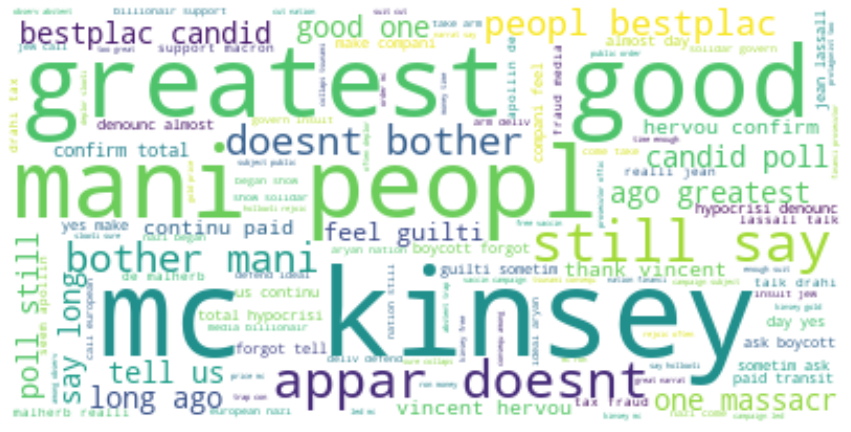

In [10]:
positive =' '.join([i for i in data['tweet'][data['Positive'] > data["Negative"]]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(positive)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

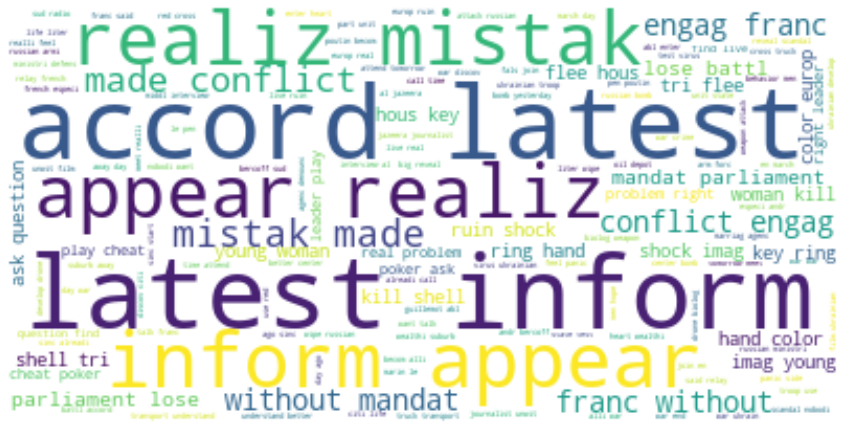

In [11]:
negative =' '.join([i for i in data['tweet'][data['Negative'] > data["Positive"]]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(negative)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()